## Faulty vs nonfaulty with better validation data


In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import confusion_matrix2 as confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Load training data
train_data2 = pd.read_csv("../TrainingData/neodata/fault_all_nonoise_67.csv")
test_data = pd.read_csv("../TestData/neodata/fault_all_nonoise_67.csv")
#train_data.head()

# Set faults to 1
train_data2.loc[train_data2['target']!=0,'target'] = 1
test_data.loc[test_data['target']!=0,'target'] = 1

# Split training data into traning and validation data.
val_data = train_data2.loc[np.array(train_data2['Tamb']==20) & np.array(train_data2['Tset']==7)]
train_data1 = train_data2.loc[np.array(train_data2['Tamb']!=20) | np.array(train_data2['Tset']!=7)]

print(train_data1.size+val_data.size,train_data2.size)

303912 303912


In [3]:
# Set the amount of faulty and non-faulty data equal
train_data_fault = train_data1.loc[train_data1['target']!=0]
train_data_fault2 = train_data_fault.sample(1200)                   #Taking 1200 sampels of the faulty data
train_data_fault2['target'] = 1                                     #Setting target to 1

train_data_NoFault = train_data1.loc[train_data1['target']==0]        #Taking 1200 sampels of non-faulty
train_data_NoFault2 = train_data_NoFault.copy()

train_data = pd.concat([train_data_fault2,train_data_NoFault2])

X_trn1 = train_data.drop(['target'],axis =1 )
X_val1 = val_data.drop(['target'],axis=1)
X_tst1 = test_data.drop(['target'],axis=1)

y_trn=train_data['target']
y_val=val_data['target']
y_tst=test_data['target']


scale = StandardScaler()
X_trn = scale.fit_transform(X_trn1)
X_val = scale.transform(X_val1)
X_tst = scale.transform(X_tst1)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Confusion matrix : Accuracy 57.711%'}, xlabel='Predicted class', ylabel='True class'>)

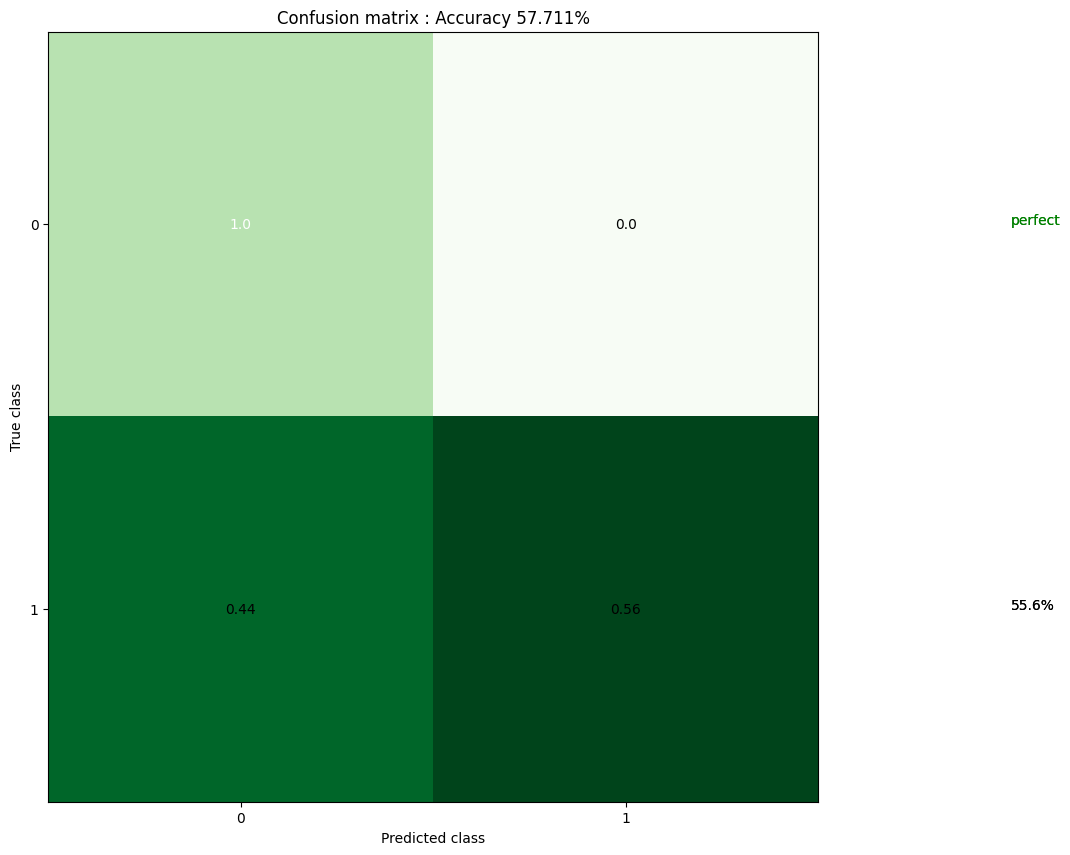

In [24]:
#Traning SVM ;) Finnaly
clf = svm.SVC(kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.005)
clf.fit(X_trn,y_trn)
y_val_predict = clf.predict(X_val)
confusion_matrix.confusion_matrix(y_val,y_val_predict)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Confusion matrix : Accuracy 57.143%'}, xlabel='Predicted class', ylabel='True class'>)

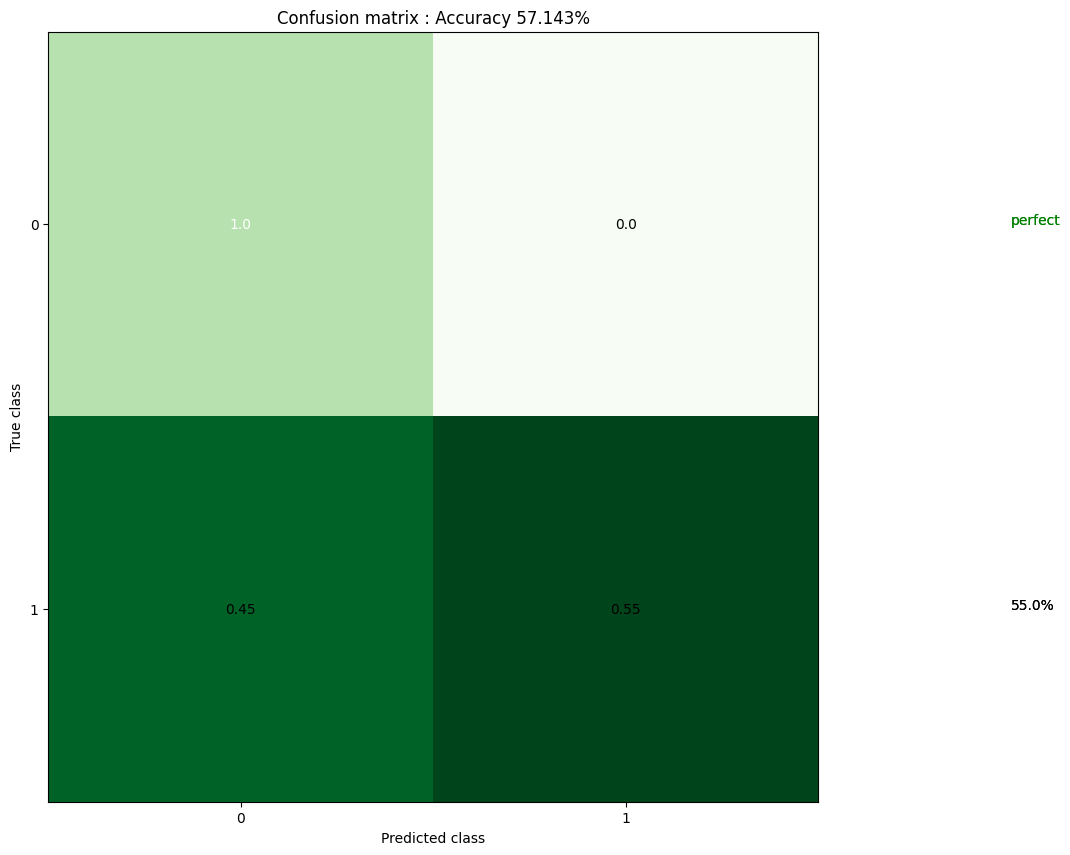

In [25]:
#Test the machine
y_tst_predict = clf.predict(X_tst)
confusion_matrix.confusion_matrix(y_tst,y_tst_predict)